In [ ]:
##Project 1 JN

#Most interested in:
""""
* Event Date - have certain planes become safer over the years?
* Purpose of Flight - are certain purposes more dangerous than others?
* Injury Severity - how severe were the injuries?
* Aircraft damage - how severe were the planes damaged?
* All columns related to injuries - most important factor is human lives, how do they fare in accidents?
* Weather Condition - what type of weather has been involved with crashes?
* Broad Phase of Flight - do certain planes not fare well in specific phases of flight?
* Report Status - do certain planes tend to have fault on the plane themselves?


Thoughts:
* Can we show that there are planes that have been in bad crashes but with minimal injuries or fatalaties? 
    If so, shows that plan is safe in the case of an accident.
* Do certain planes fare better than others in Weather Conditions?

Initial Tasks:
* DONE --- standardize column names
* DONE --- change date column to date format
* DONE --- change Inj cols with values like "Fatal(2)" to 'Fatal' b/c # fatal is taken care of in Total.Fatal.Injuries
* IN PROGRESS --- Analyze how many Null vales we have and decide how to handle

Possible Recommendations:
* which type of aircraft is safest (back it up with data related to #injuries/fatalaties and any growth in safety over time)
* which locations seem safer (see if there are areas that are more dangerous potentially due to weather)
* which purpose of flight tends to be safer (see if correlation between crashes and personal or commercial)

"""

In [25]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#import data and save to df
aviation_df = pd.read_csv('Data/Aviation_Data.csv')
state_codes_df = pd.read_csv('Data/USState_Codes.csv')

C:\Users\emily\anaconda3\New folder\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [27]:
#Standardize column names
aviation_df = aviation_df.rename(columns = lambda x: x.replace(".", "_").lower())

#Convert event_date column to timestamp type
aviation_df['event_date'] = pd.to_datetime(aviation_df['event_date'])

In [28]:
aviation_df.head(30)

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [29]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                88889 non-null  object        
 1   investigation_type      90348 non-null  object        
 2   accident_number         88889 non-null  object        
 3   event_date              88889 non-null  datetime64[ns]
 4   location                88837 non-null  object        
 5   country                 88663 non-null  object        
 6   latitude                34382 non-null  object        
 7   longitude               34373 non-null  object        
 8   airport_code            50249 non-null  object        
 9   airport_name            52790 non-null  object        
 10  injury_severity         87889 non-null  object        
 11  aircraft_damage         85695 non-null  object        
 12  aircraft_category       32287 non-null  object

In [30]:
aviation_df['injury_severity'].head(30)

0      Fatal(2)
1      Fatal(4)
2      Fatal(3)
3      Fatal(2)
4      Fatal(1)
5     Non-Fatal
6      Fatal(4)
7     Non-Fatal
8     Non-Fatal
9     Non-Fatal
10    Non-Fatal
11    Non-Fatal
12    Non-Fatal
13     Fatal(1)
14     Fatal(1)
15     Fatal(2)
16    Non-Fatal
17     Fatal(3)
18    Non-Fatal
19    Non-Fatal
20    Non-Fatal
21    Non-Fatal
22    Non-Fatal
23     Incident
24     Fatal(2)
25     Fatal(8)
26     Fatal(1)
27    Non-Fatal
28    Non-Fatal
29    Non-Fatal
Name: injury_severity, dtype: object

In [31]:
#Analyze injury columns and notice that we have very weird data with only Max present
aviation_df[['injury_severity','total_fatal_injuries','total_serious_injuries','total_minor_injuries','total_uninjured']].describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured
count,77488.000000,76379.000000,76956.000000,82977.000000
mean,0.647855,0.279881,0.357061,5.325440
std,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,2.000000
max,349.000000,161.000000,380.000000,699.000000


In [32]:
#Find how many NAs in this column -> 2.7% of all entries have NA for injury_severity
aviation_df['injury_severity'].isna().sum()

#Change NAs in this column to Not Applicable for now. Can possibly change this later based on injury columns 
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].isna()] = 'Not Applicable'

#Check to confirm the replacement worked
aviation_df['injury_severity'].isna().sum()

C:\Users\emily\anaconda3\New folder\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0

In [33]:
aviation_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [34]:
#Change all values with Fatal() to just Fatal b/c counts are taken care of in total_fatalaties column
aviation_df['injury_severity'].loc[aviation_df['injury_severity'].str.contains("Fatal\(.*\)")] = 'Fatal'

C:\Users\emily\anaconda3\New folder\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [35]:
#Confirm that change was successful
aviation_df['injury_severity'].value_counts()

Non-Fatal         67357
Fatal             17826
Not Applicable     2459
Incident           2219
Minor               218
Serious             173
Unavailable          96
Name: injury_severity, dtype: int64

# Checkpoint
### At this point we have completed the following:
    1. Import libraries
    2. Import data
    3. Standardize column names
    4. Change event_date type to timestamp
    5. Clean up 'injury_severity' column by replaceing NAs with 'Not Applicable' 
        and removing counts b/c are represented in total_fatalities column

# # Next Steps: 
### Make graphs to find correlations and relationships between columns
1. 
    

In [36]:
#Check to see how many Nulls in each columns
aviation_df.isna().sum()

event_id                   1459
investigation_type            0
accident_number            1459
event_date                 1459
location                   1511
country                    1685
latitude                  55966
longitude                 55975
airport_code              40099
airport_name              37558
injury_severity               0
aircraft_damage            4653
aircraft_category         58061
registration_number        2776
make                       1522
model                      1551
amateur_built              1561
number_of_engines          7543
engine_type                8536
far_description           58325
schedule                  77766
purpose_of_flight          7651
air_carrier               73700
total_fatal_injuries      12860
total_serious_injuries    13969
total_minor_injuries      13392
total_uninjured            7371
weather_condition          5951
broad_phase_of_flight     28624
report_status              7840
publication_date          16689
dtype: i

In [37]:
aviation_df[['make','model','number_of_engines','engine_type']].value_counts()

make                      model              number_of_engines  engine_type  
Cessna                    152                1.0                Reciprocating    2157
                          172                1.0                Reciprocating    1235
                          172N               1.0                Reciprocating     986
Piper                     PA-28-140          1.0                Reciprocating     800
Cessna                    150                1.0                Reciprocating     709
                                                                                 ... 
MICHAEL BURTON            Calidus            1.0                Reciprocating       1
MICHAEL ADAMCZYK          ZENITH CH750       1.0                Reciprocating       1
MICHAEL A HOWARD          DOMINATOR          1.0                Reciprocating       1
MEYERS INDUSTRIES INC     200C               1.0                Reciprocating       1
107.5 Flying Corporation  One Design DR 107  1.0              

In [38]:
aviation_df['make'].value_counts()

Cessna                22227
Piper                 12029
CESSNA                 4922
Beech                  4330
PIPER                  2841
                      ...  
MILLER STEVEN M           1
Flight Design GmbH        1
WALTER C SMYTHE           1
Murphey                   1
POWERCHUTE                1
Name: make, Length: 8237, dtype: int64

In [39]:
aviation_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [40]:
#subsetting to include only crashes with investigation type as "Accident"
aviation_accidents_df = aviation_df[aviation_df['investigation_type'] == 'Accident']
#creating a subset for the top 10 countries with values in this dataset
country_counts = aviation_accidents_df['country'].value_counts()
top_10_countries = country_counts.head(10)
aviation10subset = aviation_accidents_df[aviation_accidents_df['country'].isin(top_10_countries.index)]
aviation10subset.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [41]:
aviation_accidents_df['make'].value_counts().head(10)

Cessna      21973
Piper       11885
CESSNA       4820
Beech        4170
PIPER        2799
Bell         2093
Grumman      1080
Mooney       1074
BEECH        1007
Robinson      943
Name: make, dtype: int64

In [42]:
#standardizing the names of the airplane makes by making them all lower case with first letter capitalized
aviation_accidents_df.loc[:, 'make'] = aviation_accidents_df['make'].str.lower().str.capitalize()

C:\Users\emily\anaconda3\New folder\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [43]:
#replacing some names that were inconsistent in airplane make
aircraft_dict = {
    'Robinson helicopter company' : 'Robinson helicopter',
    'Robinson' : 'Robinson helicopter',
    'Robinson Helicopter' : 'Robinson helicopter'}
aviation_accidents_df.loc[:, 'make'] = aviation_accidents_df['make'].replace(aircraft_dict)

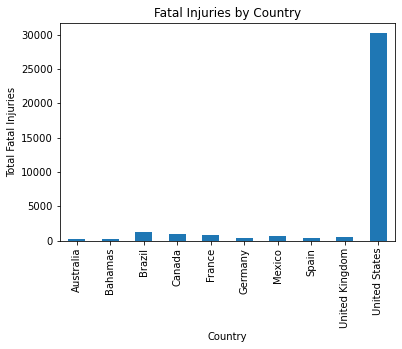

In [44]:
#Plotting top 10 countries by number of fatal injuries
groupby_df = aviation10subset.groupby('country')['total_fatal_injuries'].sum()
groupby_df.plot(kind='bar')

plt.xlabel('Country')
plt.ylabel('Total Fatal Injuries')
plt.title('Fatal Injuries by Country')
plt.show()

#### From above bar chart, we are seeing that the overwhelming majority of plane crashes happen in the US based on this data, so maybe we should not focus on country. It could just be that it's a huge country with a huge amount of flights.

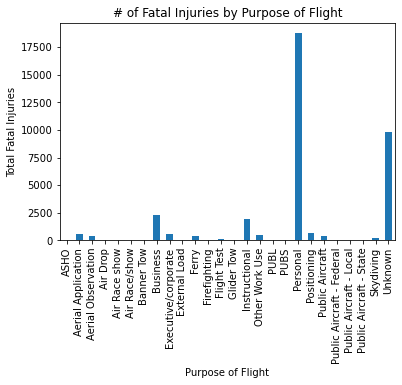

In [45]:
#plotting number of fatal injuries by purpose of flight to see if private flights result in more crashes
purpose_groupby_df = aviation_df.groupby('purpose_of_flight')['total_fatal_injuries'].sum()
purpose_groupby_df.plot(kind='bar')

plt.xlabel('Purpose of Flight')
plt.ylabel('Total Fatal Injuries')
plt.title('# of Fatal Injuries by Purpose of Flight')
plt.show()

<ipython-input-46-d50d06a36363>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(purpose_groupby_df.index, rotation='vertical')


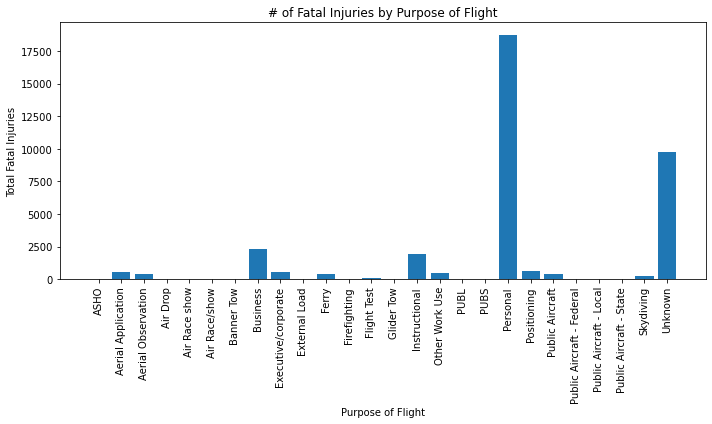

In [46]:
#other method of plotting these variables
purpose_groupby_df = aviation_df.groupby('purpose_of_flight')['total_fatal_injuries'].sum()
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(purpose_groupby_df.index, purpose_groupby_df.values)

ax.set_xlabel('Purpose of Flight')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('# of Fatal Injuries by Purpose of Flight')
ax.set_xticklabels(purpose_groupby_df.index, rotation='vertical')

plt.tight_layout()

plt.show()

In [55]:
#setting up the data so I can get top 20 airplane makes and below make bar charts 
make_count = aviation_accidents_df['make'].value_counts()
top_20_make = make_count.head(20)
make_subset = aviation_accidents_df[aviation_accidents_df['make'].isin(top_20_make.index)]
make_subset.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001


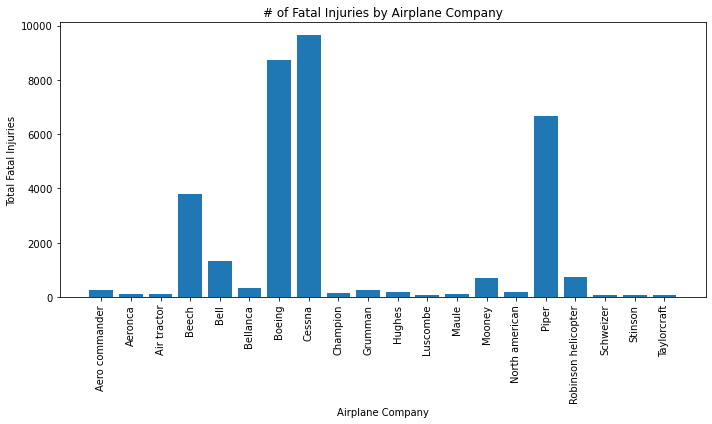

In [56]:
#graph of fatalities by make
make_groupby_df = make_subset.groupby('make')['total_fatal_injuries'].sum()

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(make_groupby_df.index, make_groupby_df.values)

ax.set_xlabel('Airplane Company')
ax.set_ylabel('Total Fatal Injuries')
ax.set_title('# of Fatal Injuries by Airplane Company')

plt.xticks(rotation='vertical')  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()

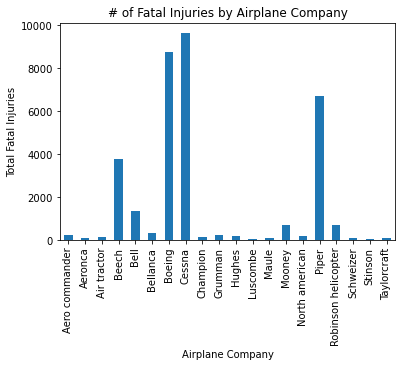

In [58]:
#second graph method for bar chart of total fatalities by make
make_groupby_df = make_subset.groupby('make')['total_fatal_injuries'].sum()
make_groupby_df.plot(kind='bar')

plt.xlabel('Airplane Company')
plt.ylabel('Total Fatal Injuries')
plt.title('# of Fatal Injuries by Airplane Company')
plt.show()

In [61]:
aviation_accidents_df.columns

Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [71]:
aviation_accidents_df['engine_type'].value_counts()

Reciprocating    68909
Turbo Shaft       3490
Turbo Prop        2957
Unknown           1924
Turbo Fan         1398
Turbo Jet          462
None                19
Electric             9
LR                   2
NONE                 2
Hybrid Rocket        1
UNK                  1
Name: engine_type, dtype: int64

In [79]:
aviation_accidents_df.to_csv("Em_aviation_crashesdata.csv")